In [1]:
# Segment Two Machine Learning Model
# Initial version by Josh Stowe, Team Hansen Brothers, Final Capstone Project 202211/8

In [2]:
# mlenv (Python 3.7.13)
# Import dependencies
import numpy as np
import pandas as pd
from pandas import DataFrame
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


In [3]:
# # Load the game stats database for split, train, test
# file_path = Path('Resources/game_teams_stats.csv')
# df = pd.read_csv(file_path)
# df.head()
file_path = Path('Resources/ml_table.csv')
adv_df = pd.read_csv(file_path)
adv_df.head()


,game_id,team_id_home,abbreviation_home,won_home,goals_home,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,winoutshootopp_home,...,goals_away,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,winoutshootopp_away,winoutshotbyopp_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
0,2000020003,7,BUF,t,4,0.000000,0.857143,30,21,True,...,2,0.142857,1.000000,21,30,False,False,50.000007,0.095238,0.866667
1,2000020004,4,PHI,t,6,0.428571,1.000000,33,29,True,...,3,0.000000,0.571429,29,33,False,False,50.000007,0.103448,0.818182
2,2000020005,20,CGY,f,3,0.000000,0.750000,21,28,False,...,4,0.250000,1.000000,28,21,True,False,50.000007,0.142857,0.857143
3,2000020006,27,PHX,t,4,0.333333,0.750000,20,33,False,...,1,0.250000,0.666667,33,20,False,False,50.000007,0.030303,0.800000
4,2000020007,1,NJD,t,8,0.250000,0.571429,34,30,True,...,4,0.428571,0.750000,30,34,False,False,50.000007,0.133333,0.764706


# Placeholder for preprocessing

In [4]:
adv_df.isna().sum()

game_id                      0
team_id_home                 0
abbreviation_home            0
won_home                     0
goals_home                   0
powerPlayPrct_home           0
penaltyKillPrct_home         0
shots_home                   0
shotsallowed_home            0
winoutshootopp_home          0
winoutshotbyopp_home         0
faceOffWinPercentage_home    0
shootingPrct_home            0
savePrct_home                0
team_id_away                 0
abbreviation_away            0
won_away                     0
goals_away                   0
powerPlayPrct_away           0
penaltyKillPrct_away         0
shots_away                   0
shotsallowed_away            0
winoutshootopp_away          0
winoutshotbyopp_away         0
faceOffWinPercentage_away    0
shootingPrct_away            0
savePrct_away                0
dtype: int64

In [5]:
# preprocessing, TBC after db cleaning complete
# merge dfs
# adv_df = advanced_home_df.reset_index().join(advanced_away_df, on='game_id', lsuffix='home_', rsuffix='away_')

# encode home_win true to 1, false to 0
# Use LabelEncoder to convert 'M/F' into integer labels
adv_df = adv_df
adv_df['won_home'] = LabelEncoder().fit_transform(adv_df['won_home'])

# drop columns not relevant
adv_df = adv_df.drop(columns="won_away")
adv_df = adv_df.drop(columns="abbreviation_home")
adv_df = adv_df.drop(columns="abbreviation_away")
adv_df = adv_df.drop(columns="team_id_home")
adv_df = adv_df.drop(columns="team_id_away")
adv_df = adv_df.drop(columns="game_id")
adv_df = adv_df.drop(columns="goals_home")
adv_df = adv_df.drop(columns="goals_away")


# encode winoutshootopp_home, winoutshotopp_home, winoutshotbyopp_away, winoutshootbyopp_away true to 1, false to 0
adv_df['winoutshootopp_home'] = LabelEncoder().fit_transform(adv_df['winoutshootopp_home'])
adv_df['winoutshotbyopp_home'] = LabelEncoder().fit_transform(adv_df['winoutshotbyopp_home'])
adv_df['winoutshootopp_away'] = LabelEncoder().fit_transform(adv_df['winoutshootopp_away'])
adv_df['winoutshotbyopp_away'] = LabelEncoder().fit_transform(adv_df['winoutshotbyopp_away'])

adv_df = adv_df.drop(columns="winoutshootopp_home")
adv_df = adv_df.drop(columns="winoutshotbyopp_home")
adv_df = adv_df.drop(columns="winoutshootopp_away")
adv_df = adv_df.drop(columns="winoutshotbyopp_away")


# Split the Data into Training and Testing

In [6]:
# Create the features
# adjust X df with the target features
X = adv_df.drop(columns="won_home")
X.head()

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
0,0.000000,0.857143,30,21,50.000007,0.133333,0.904762,0.142857,1.000000,21,30,50.000007,0.095238,0.866667
1,0.428571,1.000000,33,29,50.000007,0.181818,0.896552,0.000000,0.571429,29,33,50.000007,0.103448,0.818182
2,0.000000,0.750000,21,28,50.000007,0.142857,0.857143,0.250000,1.000000,28,21,50.000007,0.142857,0.857143
3,0.333333,0.750000,20,33,50.000007,0.200000,0.969697,0.250000,0.666667,33,20,50.000007,0.030303,0.800000
4,0.250000,0.571429,34,30,50.000007,0.235294,0.866667,0.428571,0.750000,30,34,50.000007,0.133333,0.764706


In [7]:
# create the target
y = adv_df["won_home"]
y.head()

0    1
1    1
2    0
3    1
4    1
Name: won_home, dtype: int32

In [43]:
X.to_csv("Resources/X.csv")

In [9]:
X.dtypes

powerPlayPrct_home           float64
penaltyKillPrct_home         float64
shots_home                     int64
shotsallowed_home              int64
faceOffWinPercentage_home    float64
shootingPrct_home            float64
savePrct_home                float64
powerPlayPrct_away           float64
penaltyKillPrct_away         float64
shots_away                     int64
shotsallowed_away              int64
faceOffWinPercentage_away    float64
shootingPrct_away            float64
savePrct_away                float64
dtype: object

In [10]:
# Placeholder for column data type conversion

In [11]:
# Create train, test datasets
# Intention is to test sensitivity of test accuracy with the train/test size and select the split ratio that gives the 
# best accuracy prior to another sampling adjustments.
X_train, X_test, y_train, y_test = train_test_split(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=None, test_size=0.15)



In [12]:
X_train

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
19973,0.500000,0.750000,28,33,39.100000,0.250000,0.909091,0.250000,0.500000,33,28,60.900000,0.090909,0.750000
457,0.666667,1.000000,37,23,50.000007,0.081081,0.782609,0.000000,0.333333,23,37,50.000007,0.217391,0.918919
6516,0.333333,0.333333,42,19,50.000007,0.071429,0.894737,0.666667,0.666667,19,42,50.000007,0.105263,0.928571
349,0.000000,1.000000,29,23,50.000007,0.068966,0.826087,0.000000,1.000000,23,29,50.000007,0.173913,0.931034
21059,0.500000,0.333333,33,19,40.000000,0.090909,0.894737,0.666667,0.500000,19,33,60.000000,0.105263,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10793,0.200000,0.500000,36,33,48.600000,0.083333,0.909091,0.500000,0.800000,33,36,51.400000,0.090909,0.916667
13395,0.500000,1.000000,15,40,35.400000,0.133333,0.925000,0.000000,0.500000,40,15,64.600000,0.075000,0.866667
6163,0.333333,0.800000,32,28,50.000007,0.187500,0.892857,0.200000,0.666667,28,32,50.000007,0.107143,0.812500
12042,0.000000,0.600000,25,28,53.300000,0.040000,0.857143,0.400000,1.000000,28,25,46.700000,0.142857,0.960000


In [13]:
X_test

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
14068,0.000000,1.000000,21,21,37.500000,0.095238,1.000000,0.000000,1.000000,21,21,62.500000,0.000000,0.904762
273,0.333333,0.833333,32,36,50.000007,0.093750,0.944444,0.166667,0.666667,36,32,50.000007,0.055556,0.906250
7599,0.166667,1.000000,46,25,50.000007,0.086957,0.880000,0.000000,0.833333,25,46,50.000007,0.120000,0.913043
4210,0.000000,0.500000,35,26,50.000007,0.142857,0.923077,0.500000,1.000000,26,35,50.000007,0.076923,0.857143
16519,0.000000,0.666667,37,20,49.200000,0.108108,0.650000,0.333333,1.000000,20,37,50.800000,0.350000,0.891892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,0.333333,1.000000,28,16,50.000007,0.071429,0.687500,0.000000,0.666667,16,28,50.000007,0.312500,0.928571
3787,0.000000,0.750000,25,31,50.000007,0.160000,0.935484,0.250000,1.000000,31,25,50.000007,0.064516,0.840000
11390,0.500000,0.666667,39,40,43.500000,0.076923,0.975000,0.333333,0.500000,40,39,56.500000,0.025000,0.923077
1641,0.500000,1.000000,20,36,50.000007,0.150000,0.944444,0.000000,0.500000,36,20,50.000007,0.055556,0.850000


In [14]:
y_train

19973    1
457      0
6516     1
349      0
21059    1
        ..
10793    1
13395    0
6163     1
12042    0
154      1
Name: won_home, Length: 16885, dtype: int32

In [15]:
y_test

14068    1
273      1
7599     1
4210     1
16519    0
        ..
538      0
3787     1
11390    1
1641     1
22448    1
Name: won_home, Length: 5629, dtype: int32

In [16]:
# Placeholder for any scaler implementation
# Scale the dataset using MinMaxScaler()
# X_scaled = MinMaxScaler().fit_transform(X)

# Scale the dataset using StandardScaler()
# X_scaled = StandardScaler().fit_transform(X)

# X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,stratify=None, test_size=0.15)
# X_scaled

# ML model

In [17]:
# LogisticRegression model, predicting a 1 or 0 outcome
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)
# classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

# print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

# Tesing the non-negative least squares if db allows
# model = LinearRegression(positive=True)

# # Fit the model to the training data, and calculate the scores for the training and testing data.
# model.fit(X_train, y_train)
# y_pred = model.fit(X_train,y_train).predict(X_test)
# y_pred = model.predict(X_test)

# training_score = model.score(X_train, y_train)
# testing_score = model.score(X_test, y_test)
# r2_score_model = r2_score(y_test,y_pred)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")
# print(f"R2 score", r2_score_model)

Training Data Score: 0.946875925377554
Testing Data Score: 0.9459939598507728


,Prediction,Actual
14068,1,1
273,1,1
7599,1,1
4210,1,1
16519,0,0
...,...,...
538,0,0
3787,1,1
11390,1,1
1641,1,1


In [18]:


y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,2373,164
Actual 1,140,2952


In [19]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9459939598507728


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9997038791827065
Testing Score: 0.9529223663172854


[0.01460103 0.01618023 0.03279347 0.03338363 0.01322142 0.20591076
 0.19110442 0.01460943 0.01539359 0.03357418 0.0325112  0.01297495
 0.18960981 0.19413186]


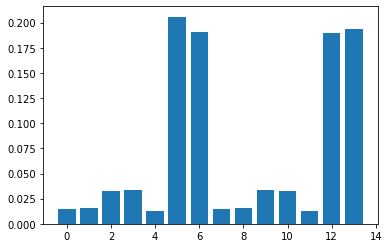

In [21]:
from matplotlib import pyplot as plt
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [22]:
precision = tp / (tp + fp)
precision

0.9473684210526315

In [23]:
# Calculate the sensitivity of the model based on the confusion matrix
sensitivity = tp / (tp + fn)
sensitivity

0.9547218628719275

In [24]:
# f1 = 2*precision*sensitivity / (precision + sensitivity)
# f1

In [25]:
# print(classification_report(y_true, y_pred))

In [26]:
# # Plot the residuals for the training and testing data.

# ### BEGIN SOLUTION
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
# plt.title("Residual Plot")
# plt.show()
# ### END SOLUTION

In [27]:
# sharks then blues
X_prediction_test = pd.DataFrame([{0.186,0.923,31.0714,31.4286,49.6,0.083,0.895,0.207,0.708,29.0909,32.0909,51.4,0.072,0.878}])
X_prediction_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.186,0.923,0.083,0.895,0.207,0.708,32.0909,0.072,0.878,49.6,51.4,31.0714,29.0909,31.4286


In [28]:
prediction_test = classifier.predict(X_prediction_test)
pd.DataFrame({"Prediction": prediction_test})

c:\Users\fenwa\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Prediction
0,0


In [29]:
# islanders then coyotes
X_prediction_test = pd.DataFrame([{0.191,0.870,31.7857,33.0,49.4,0.110,0.922,0.293,0.804,23.4167,36.6667,45.5,0.125,0.895}])
X_prediction_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.191,0.87,33.0,0.11,0.922,0.293,0.804,36.6667,0.125,0.895,45.5,49.4,23.4167,31.7857


In [30]:
prediction_test = classifier.predict(X_prediction_test)
pd.DataFrame({"Prediction": prediction_test})

c:\Users\fenwa\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Prediction
0,0


In [31]:
# # Dependencies
# import requests
# from pprint import pprint
# # from config import api_key

# query_url = "https://statsapi.web.nhl.com/api/v1/teams/1/stats"


In [32]:
# # Request articles
# # home_team = requests.get(query_url).json()
# home_team


In [33]:
# home_stats = home_team['stats']
# home_stats

In [34]:
# home_splits = home_stats[0]['splits']
# home_splits

In [35]:
# export model to h5


In [36]:
import requests

In [37]:
# home team
url = "https://statsapi.web.nhl.com/api/v1/teams/6/?expand=team.stats"
home = requests.get(url).json()


url = "https://statsapi.web.nhl.com/api/v1/teams/23/?expand=team.stats"
away = requests.get(url).json()


In [38]:
gamedata = []
id = home['teams'][0]['teamStats'][0]['splits'][0]['team']['id']
name = home['teams'][0]['teamStats'][0]['splits'][0]['team']['name']
gpg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
gapg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsAgainstPerGame']
pppctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['powerPlayPercentage']
pkpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['penaltyKillPercentage']
shots = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsPerGame']
shotsallowed = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsAllowed']
winoutshootopp = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshootOpp']
winoutshotbyopp = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshotByOpp']
faceoffpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['faceOffWinPercentage']
shootingpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shootingPctg']
savepctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['savePctg']
gamedata.append({
    # "id" : id,
                  "name" : name,
                #  "gpg" : gpg,
                #  "gapg" : gapg,
                 "pppctg" : float(pppctg)/100,
                 "pkpctg" : float(pkpctg)/100,
                 "shots" : shots,
                 "shotsallowed" : shotsallowed,
                #  "winoutshootopp" : winoutshootopp,
                #  "winoutshotbyopp" : winoutshotbyopp,
                 "faceoffpctg" : faceoffpctg,
                 "shootingpctg" : float(shootingpctg)/100,
                 "savepctg" : savepctg})
home_df = pd.DataFrame(gamedata)

In [39]:
gamedata = []
id = away['teams'][0]['teamStats'][0]['splits'][0]['team']['id']
name = away['teams'][0]['teamStats'][0]['splits'][0]['team']['name']
gpg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
gapg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsAgainstPerGame']
pppctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['powerPlayPercentage']
pkpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['penaltyKillPercentage']
shots = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsPerGame']
shotsallowed = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsAllowed']
winoutshootopp = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshootOpp']
winoutshotbyopp = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshotByOpp']
faceoffpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['faceOffWinPercentage']
shootingpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shootingPctg']
savepctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['savePctg']
gamedata.append({
    # "awayid" : id,
                 "awayname" : name,
                #  "gpg" : gpg,
                #  "gapg" : gapg,
                 "awaypppctg" : float(pppctg)/100,
                 "awaypkpctg" : float(pkpctg)/100,
                 "awayshots" : shots,
                 "awayshotsallowed" : shotsallowed,
                #  "winoutshootopp" : winoutshootopp,
                #  "winoutshotbyopp" : winoutshotbyopp,
                 "awayfaceoffpctg" : faceoffpctg,
                 "awayshootingpctg" : float(shootingpctg)/100,
                 "awaysavepctg" : savepctg})
away_df = pd.DataFrame(gamedata)

In [40]:
test_df = pd.concat([home_df,away_df],axis=1)
test_df = test_df.drop(columns="name")
test_df = test_df.drop(columns="awayname")
prediction_test = classifier.predict(test_df)
pd.DataFrame({"Prediction": prediction_test})


c:\Users\fenwa\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- awayfaceoffpctg
- awaypkpctg
- awaypppctg
- awaysavepctg
- awayshootingpctg
- ...
Feature names seen at fit time, yet now missing:
- faceOffWinPercentage_away
- faceOffWinPercentage_home
- penaltyKillPrct_away
- penaltyKillPrct_home
- powerPlayPrct_away
- ...

  warnings.warn(message, FutureWarning)


,Prediction
0,1


In [41]:
home_df

,name,pppctg,pkpctg,shots,shotsallowed,faceoffpctg,shootingpctg,savepctg
0,Boston Bruins,0.254,0.917,33.9375,30.375,57.1,0.118,0.928


In [42]:
away_df

,awayname,awaypppctg,awaypkpctg,awayshots,awayshotsallowed,awayfaceoffpctg,awayshootingpctg,awaysavepctg
0,Vancouver Canucks,0.295,0.638,30.5294,32.9412,48.9,0.112,0.877
